In [1]:
import pandas as pd 
import numpy as np
from ast import literal_eval
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud
pd.options.mode.chained_assignment = None 

In [2]:
# pip install wordcloud

## Data preprocessing and exploration

In [3]:
#reading the datasets into dataframes
df_creds=pd.read_csv('Data/tmdb_5000_credits.csv')
df_details=pd.read_csv('Data/tmdb_5000_movies.csv')

In [4]:
print(df_creds.shape)
print(df_details.shape)

(4803, 4)
(4803, 20)


In [5]:
df_creds.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
df_details.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
#combining the 2 files into one dataframe
df_creds.columns = ['id','tittle','cast','crew']
df_main= df_details.merge(df_creds,on='id')

In [8]:
df_main.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
#checking the data fields
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [10]:
#check for null values
df_main.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
tittle                     0
cast                       0
crew                       0
dtype: int64

In [11]:
#removing the column 'tittle' which is redundant after merging the datasets
df_main.drop("tittle",axis=1,inplace=True)

In [12]:
#checking for any duplicates
df_main.duplicated().sum()

0

##### Calculation of a weighted rating based on the IMDB formula

Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where:

    W is the weighted rating
    R is the mean rating for the movie(vote_average), from 1 to 10
    v is the number of votes for the movie(vote_count)
    m is the minimum votes required (95th percentile)
    C is the mean vote across the whole report

In [13]:
C = df_main['vote_average'].mean()
m = df_main['vote_count'].quantile(0.9)

#filtered list of movies based on percentile
df_gen = df_main.copy().loc[df_main['vote_count'] >= m]

#function based on the above referenced formula
def rating_w(df, m=m, C=C):
    v = df['vote_count']
    R = df['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [14]:
#Calculating the weighted scores for all movies and adding to the dataframe
df_gen['w_score'] = df_gen.apply(rating_w, axis=1)

In [15]:
#Sorting movies based on score calculated above
df_gen = df_gen.sort_values('w_score', ascending=False)
df_gen.reset_index(drop=True, inplace=True)
df_gen.index = df_gen.index + 1

In [16]:
def generic_rec_genre(genre):
    df_genre = df_gen[df_gen['genres'].str.contains(genre)][['title', 'vote_count', 'vote_average', 'w_score','release_date']].head(10)
    df_genre.reset_index(drop=True, inplace=True)
    df_genre.index = df_genre.index + 1
    return df_genre

In [17]:
#Correcting the datatypes
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df_main[feature] = df_main[feature].apply(literal_eval)

In [18]:
#Getting the director's name from the crew list and adding as a new column
df_main["director"] = np.nan

for x in range(len(df_main["crew"])):
    for y in range(len(df_main["crew"][x])):
        if df_main["crew"][x][y]["job"] == "Director":
            df_main["director"][x] = df_main["crew"][x][y]["name"]
            break

### The threshold can be set here. Use threshold as 3 for very strict threshold and upto 10 for a lenient threshold. Make sure to rerun the code when setting a new threshold

In [19]:
threshold = 5

In [20]:
#Returns the list top elements or entire list as per the selected threshold; whichever is more.
def format_list(x,y=threshold):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > y:
            names = names[:y]
        return names
    return []

In [21]:
#Getting the number of features as per the threshold
features = ['cast', 'keywords', 'genres']
for feature in features:
    df_main[feature] = df_main[feature].apply(format_list)

In [22]:
#formatted dataframe
df_main[['title', 'cast', 'director', 'keywords', 'genres']].head(10)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,"[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,"[spy, based on novel, secret agent, sequel, mi6]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,"[dc comics, crime fighter, terrorist, secret i...","[Action, Crime, Drama, Thriller]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,"[based on novel, mars, medallion, space travel...","[Action, Adventure, Science Fiction]"
5,Spider-Man 3,"[Tobey Maguire, Kirsten Dunst, James Franco, T...",Sam Raimi,"[dual identity, amnesia, sandstorm, love of on...","[Fantasy, Action, Adventure]"
6,Tangled,"[Zachary Levi, Mandy Moore, Donna Murphy, Ron ...",Byron Howard,"[hostage, magic, horse, fairy tale, musical]","[Animation, Family]"
7,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",Joss Whedon,"[marvel comic, sequel, superhero, based on com...","[Action, Adventure, Science Fiction]"
8,Harry Potter and the Half-Blood Prince,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...",David Yates,"[witch, magic, broom, school of witchcraft, wi...","[Adventure, Fantasy, Family]"
9,Batman v Superman: Dawn of Justice,"[Ben Affleck, Henry Cavill, Gal Gadot, Amy Ada...",Zack Snyder,"[dc comics, vigilante, superhero, based on com...","[Action, Adventure, Fantasy]"


In [23]:
#cleaning the data further and creating unigrams
def data_unigram(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [24]:
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df_main[feature] = df_main[feature].apply(data_unigram)

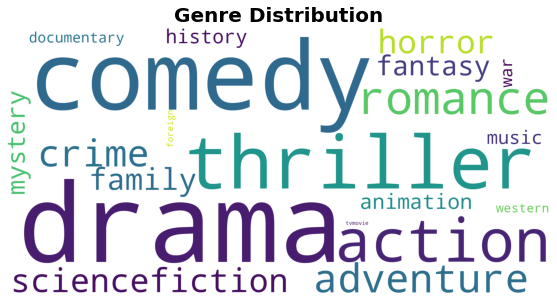

In [25]:
#creating a wordcloud based on the genres
text = df_main["genres"].tolist()
text = [' '.join(x) for x in text]
text = ' '.join(text)

word_cloud = WordCloud(width=2000, height=1000, collocations=False, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
title_string = 'Genre Distribution'
plt.title(title_string, size=20, fontweight=1000)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

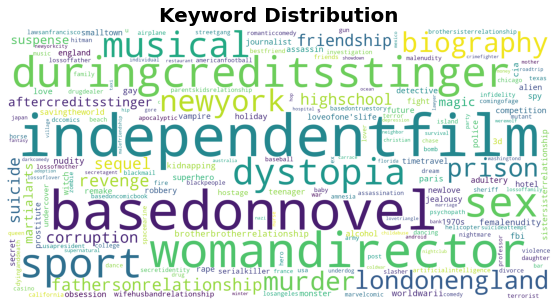

In [26]:
#creating a wordcloud based on the keywords
text = df_main["keywords"].tolist()
text = [' '.join(x) for x in text]
text = ' '.join(text)

word_cloud = WordCloud(width=2000, height=1000, collocations=False, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
title_string = 'Keyword Distribution'
plt.title(title_string, size=20, fontweight=1000)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [27]:
#combining the keywords, actors, director and genre into one column for vectorization
def combine_data(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df_main['combined_data'] = df_main.apply(combine_data, axis=1)

In [28]:
#Creating the count matrix
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_main['combined_data'])

# Compute the Cosine Similarity matrix based on the count_matrix
cosine_sim_1 = cosine_similarity(count_matrix, count_matrix)

df_main['tagline'] = df_main['tagline'].fillna('')
df_main['description'] = df_main['overview'] + df_main['tagline']
df_main['description'] = df_main['description'].fillna('')

#Creating the TF-IDF matrix
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 3),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_main['description'])

# Compute the Cosine Similarity matrix based on the TF-IDF matrix
cosine_sim_2 = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [29]:
#Reset index of our main DataFrame
df_main = df_main.reset_index()
indices = pd.Series(df_main.index, index=df_main['title'])

In [30]:
#Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim_1=cosine_sim_1, cosine_sim_2=cosine_sim_2):
    
    idx = indices[title]
    sim_scores_1 = list(cosine_sim_1[idx])
    sim_scores_2 = list(cosine_sim_2[idx])
    sim_scores_avg = []
    for k in range(len(sim_scores_1)):
        avg = (sim_scores_1[k]+sim_scores_2[k])/2
        temp_tuple = (k,avg)
        sim_scores_avg.append(temp_tuple)
    sim_scores_avg = sorted(sim_scores_avg, key=lambda x: x[1], reverse=True)
    sim_scores_avg = sim_scores_avg[1:11]
    movie_indices = [i[0] for i in sim_scores_avg]

    #Return the top 10 most similar movies
    df_ret = df_main[['title','vote_count', 'vote_average','release_date']].iloc[movie_indices]
    df_ret.reset_index(drop=True, inplace=True)
    df_ret.index = df_ret.index + 1
    return df_ret

In [31]:
def get_rec_user():
    
    m = df_main['vote_count'].quantile(0.4)
    #Filtered list of movies based on percentile
    df_main_copy = df_main.copy().loc[df_main['vote_count'] >= m]
    
    #commbining all features into one as we can only use TF-IDF in this case, since we cannot differentiate between names and other words in the user imput
    df_main_copy['description'] = df_main_copy['overview'] + df_main_copy['tagline'] + df_main_copy['genres'].astype(str) + df_main_copy['keywords'].astype(str) + df_main_copy['cast'].astype(str) + df_main_copy['director'].astype(str)
    df_main_copy['description'] = df_main_copy['description'].fillna('')

    #adding the user input in our dataframe to calculate similarity scores
    user_in = input("Enter search term here: ")    
    df_main_copy.loc[len(df_main_copy.index)] = ["","","","","","","","","","","","","","","","","","","","","","","","","",user_in]

    tfidf_matrix = tf.fit_transform(df_main_copy['description'])
    cosine_sim_3 = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    idx = len(df_main_copy.index)-1
    sim_scores_3 = list(enumerate(cosine_sim_3[idx]))
    sim_scores_3 = sorted(sim_scores_3, key=lambda x: x[1], reverse=True)
    sim_scores_3 = sim_scores_3[1:11]
    movie_indices = [i[0] for i in sim_scores_3]
    
    #Return the top 10 most similar movies
    df_ret = df_main_copy[['title','vote_count', 'vote_average','release_date']].iloc[movie_indices]
    df_ret.reset_index(drop=True, inplace=True)
    df_ret.index = df_ret.index + 1
    return df_ret

In [32]:
#the function to access the engine
def run_engine(df_main = df_main):
    print("Hello there! This recomemndation engine can work in 3 ways:")
    print("1. Get top 10 movies based on a genre")
    print("2. Get a list of 10 movies similar to another movie")
    print("3. Get a list of 10 movies based on a search")
    print()
    print("Please enter the option (1/2/3): ")
    selection_1 = input()
    if selection_1.strip() == "1":
        print ("Please enter a genre [Action, Adventure, Animation, Comedy, Crime, Documentary, Drama, Family, Fantasy, Foreign, History, Horror, Music, Mystery, Romance, Science Fiction, Thriller, Tv Movie, War, Western]: ")
        selection_2 = input()
        selection_2 = selection_2.title()
        genre_list = ["Action", "Adventure", "Animation", "Comedy", "Crime", "Documentary", "Drama", "Family", "Fantasy", "Foreign", "History", "Horror", "Music", "Mystery", "Romance", "Science Fiction", "Thriller", "Tv Movie", "War", "Western"]
        if selection_2 not in genre_list:
            print("Oops! looks like you entered an incorrect term!")
        else:
            display(generic_rec_genre(selection_2))
    elif selection_1.strip() == "2":
        print ("Please enter the title of the movie. Make sure you spell it correctly!")
        selection_3 = input()
        selection_3 = selection_3.title()
        movie_list = df_main["title"].tolist()
        if selection_3 not in movie_list:
            print("Oops! looks like we might not have this movie in the database or you entered an incorrect term!")
        else:
            print()
            display(get_recommendations(selection_3))
    elif selection_1.strip() == "3":
        display(get_rec_user())
    else:
        print("That seems like an incorrect option!")
    

In [33]:
run_engine()

Hello there! This recomemndation engine can work in 3 ways:
1. Get top 10 movies based on a genre
2. Get a list of 10 movies similar to another movie
3. Get a list of 10 movies based on a search

Please enter the option (1/2/3): 
2
Please enter the title of the movie. Make sure you spell it correctly!
star wars



,title,vote_count,vote_average,release_date
1,The Empire Strikes Back,5879,8.2,1980-05-17
2,Return of the Jedi,4665,7.9,1983-05-23
3,Star Wars: Episode III - Revenge of the Sith,4116,7.1,2005-05-17
4,Star Wars: Episode I - The Phantom Menace,4432,6.3,1999-05-19
5,Star Wars: Episode II - Attack of the Clones,3992,6.4,2002-05-15
6,The Helix... Loaded,2,4.8,2005-01-01
7,Ender's Game,2303,6.6,2013-10-23
8,Titan A.E.,313,6.3,2000-06-16
9,The Lovers,34,4.8,2015-02-13
10,After Earth,2532,5.0,2013-05-30
